In [1]:
import pandas as pd
import numpy as np
import datastats as dt
import structdata as st
import timeseries as ts
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Read in data set
train_data = pd.read_csv('Xente/training.csv')
# test_data = pd.read_csv('Xente/test.csv')
# weather_data = pd.read_excel('Xente/WeatherNairobi2016.xls')
# sample_submission = pd.read_csv('Xente/sample_submission_xente.csv')


Data Description of variables

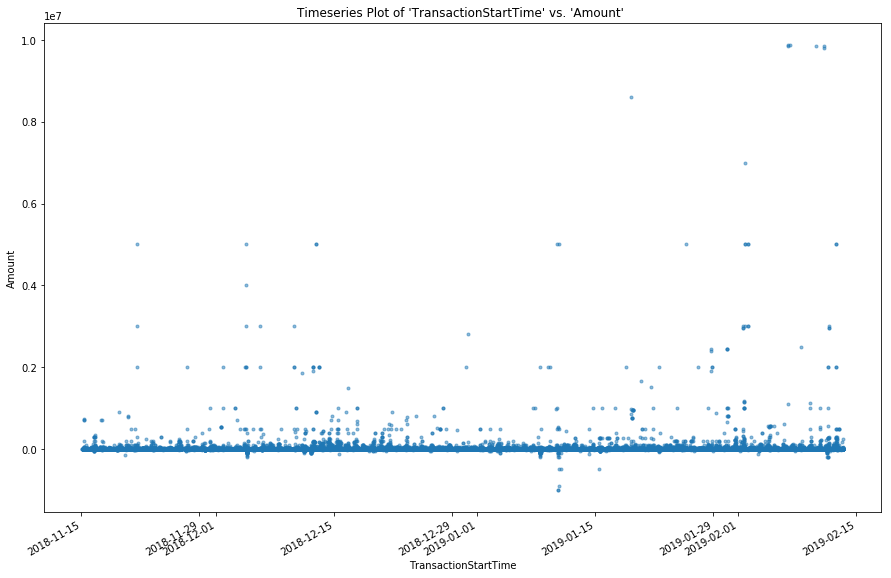

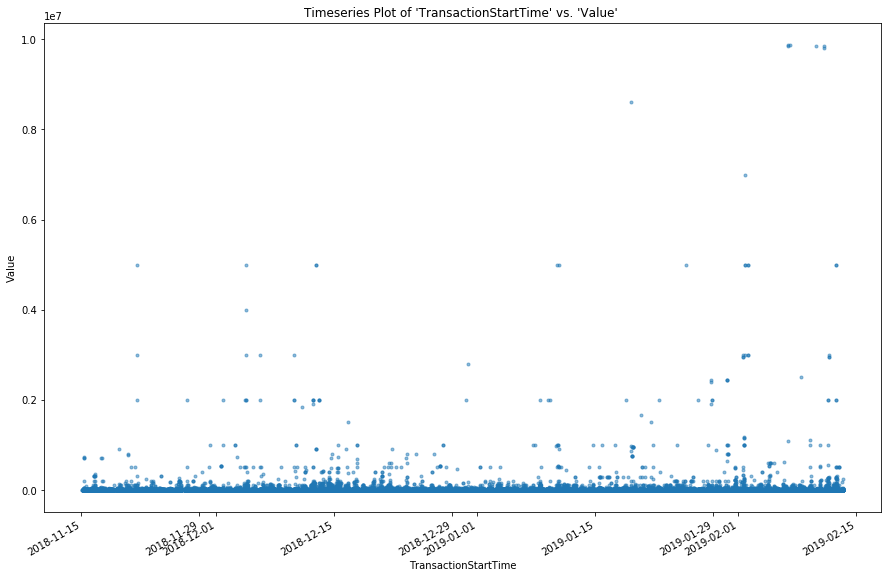

In [4]:
ts.num_to_time(train_data, num_features=['Amount', 'Value'], time_col='TransactionStartTime', subplots=False, save_fig=True)

In [20]:
train_data['TransactionStartTime'] = pd.to_datetime(train_data['TransactionStartTime'])

In [3]:
#set it as index
train_data = train_data.set_index('TransactionStartTime')
train_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
TransactionStartTime,,,,,,,,,,,,,,,
2018-11-15 02:18:49,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0
2018-11-15 02:19:08,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0
2018-11-15 02:44:21,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0
2018-11-15 03:32:55,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0
2018-11-15 03:34:21,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0


In [4]:
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Weekday Name'] = train_data.index.weekday_name
train_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Weekday Name
TransactionStartTime,,,,,,,,,,,,,,,,,,
2018-11-15 02:18:49,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,2018,11,Thursday
2018-11-15 02:19:08,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,2018,11,Thursday
2018-11-15 02:44:21,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,2018,11,Thursday
2018-11-15 03:32:55,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,2018,11,Thursday
2018-11-15 03:34:21,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,2018,11,Thursday


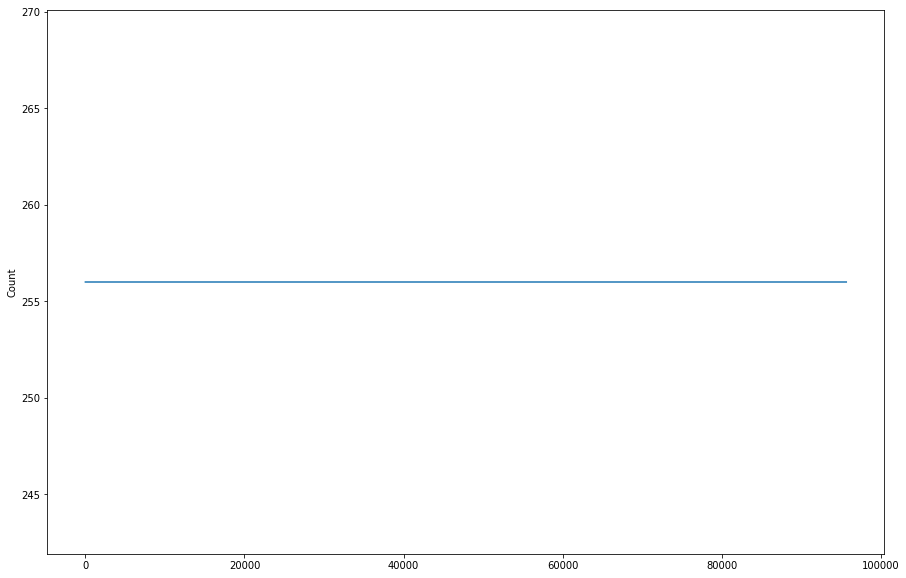

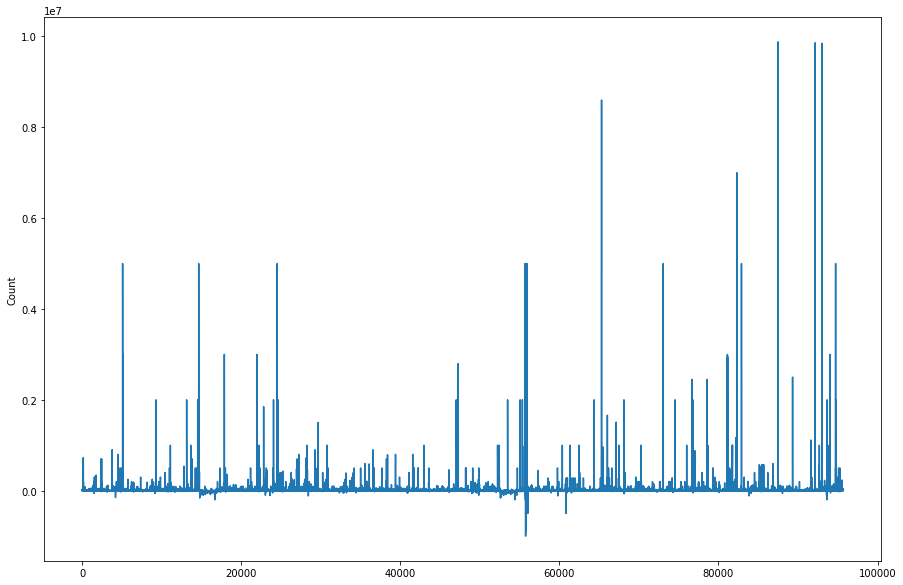

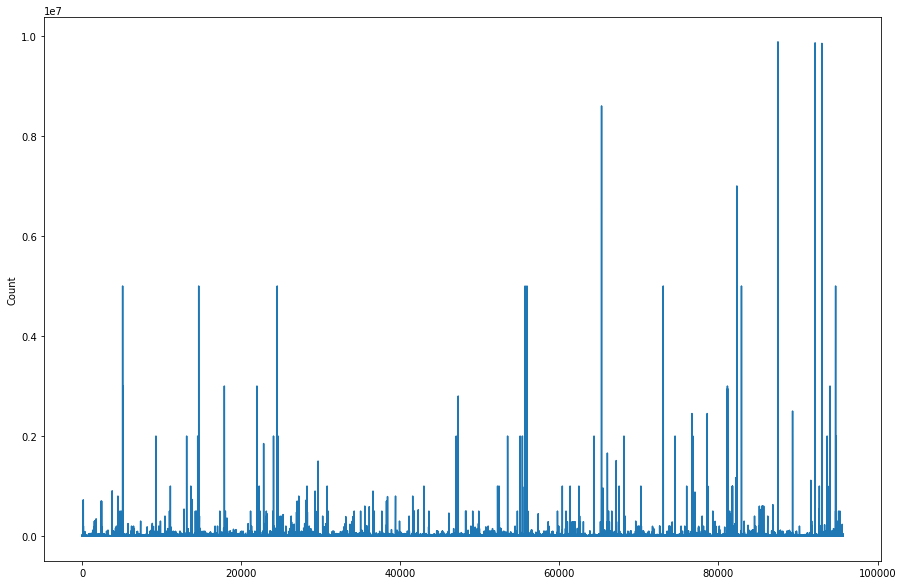

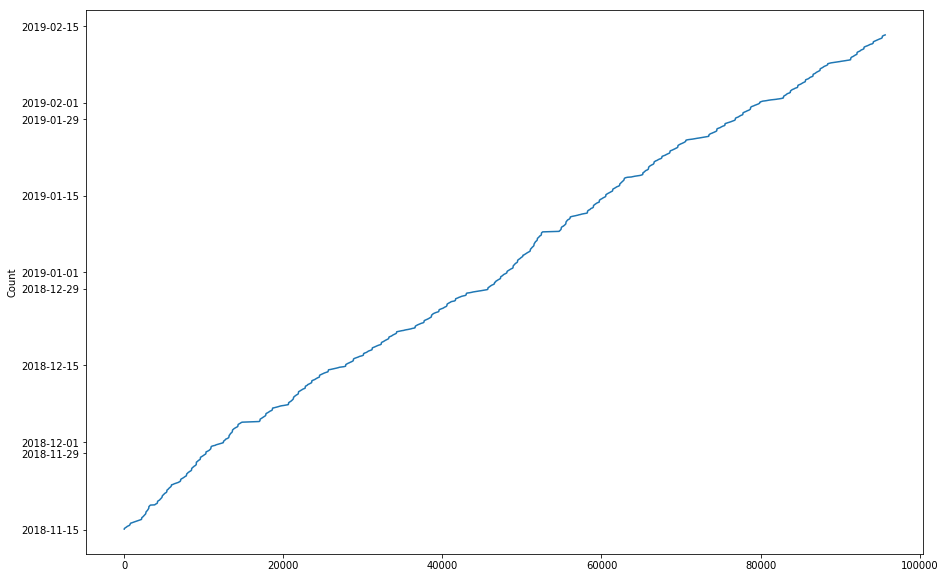

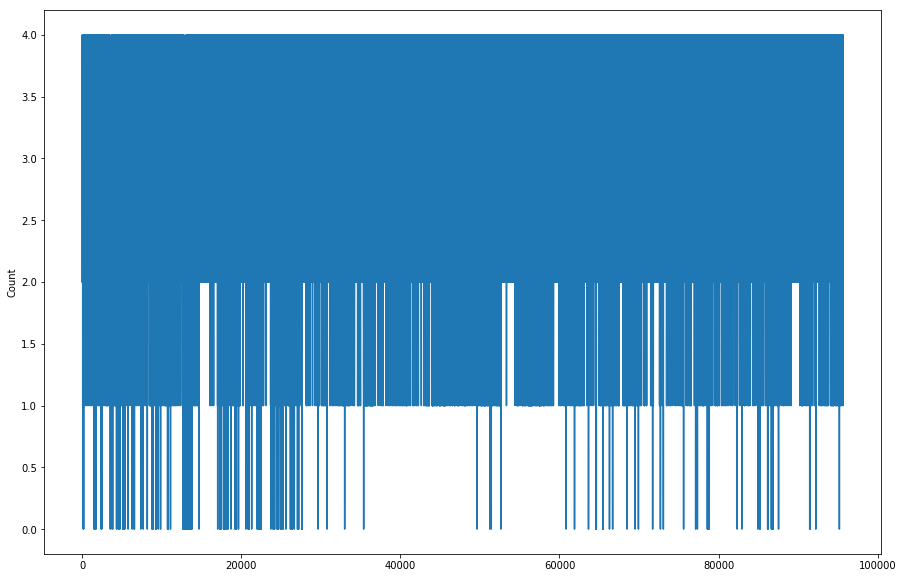

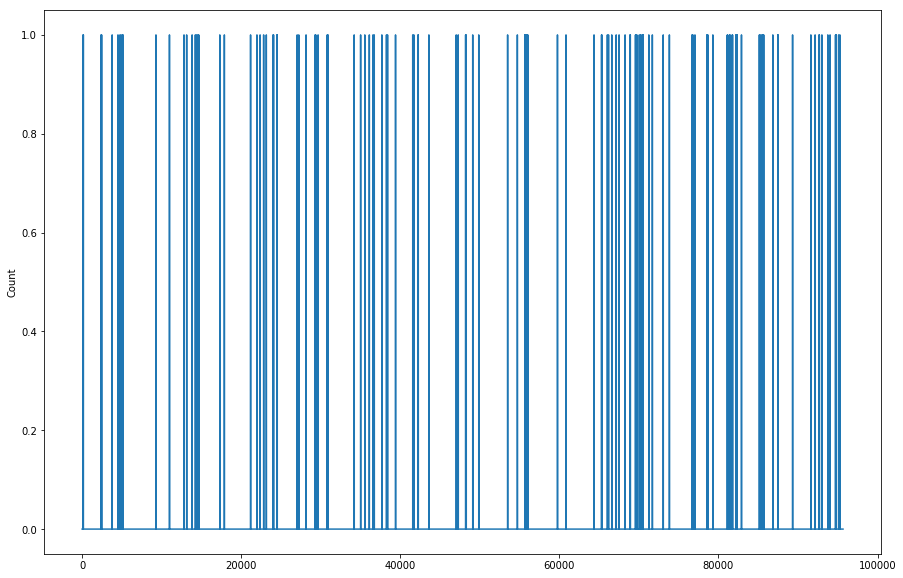

In [25]:
for col in dt.get_num_feats(train_data):
    fig = plt.figure()
    ax = fig.gca()
    axes = train_data[col].plot(subplots=False, figsize=(15,10), ax=ax) 
    plt.ylabel('Count')
    plt.show()           